In [1]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
import tarfile

dataset_tar = "/content/aircraft_damage_dataset_v1.tar"
extract_path = "/content/aircraft_damage"

with tarfile.open(dataset_tar, "r") as tar:
    tar.extractall(path=extract_path)

print("Dataset extracted successfully")


Dataset extracted successfully


/tmp/ipython-input-2338431789.py:7: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=extract_path)


In [3]:
for root, dirs, files in os.walk("/content/aircraft_damage"):
    print(root)
    break


/content/aircraft_damage


In [5]:
import os

# List the contents of the extracted directory
print(os.listdir('/content/aircraft_damage'))


['aircraft_damage_dataset_v1']


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    "/content/aircraft_damage/aircraft_damage_dataset_v1/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_data = test_gen.flow_from_directory(
    "/content/aircraft_damage/aircraft_damage_dataset_v1/test",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

Found 300 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [7]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation="relu")(x)
output = Dense(train_data.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,112,770 (91.98 MB)

 Trainable params: 525,058 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [44]:
model.fit(
    train_data,
    epochs=15,
    validation_data=test_data
)


Epoch 1/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.8631 - loss: 0.2859 - val_accuracy: 0.7000 - val_loss: 0.7187
Epoch 2/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.8397 - loss: 0.3416 - val_accuracy: 0.6600 - val_loss: 0.8954
Epoch 3/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.8200 - loss: 0.3775 - val_accuracy: 0.6800 - val_loss: 0.6752
Epoch 4/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - accuracy: 0.8557 - loss: 0.2981 - val_accuracy: 0.6600 - val_loss: 0.6479
Epoch 5/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - accuracy: 0.9157 - loss: 0.2353 - val_accuracy: 0.6400 - val_loss: 0.6773
Epoch 6/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9108 - loss: 0.2514 - val_accuracy: 0.7000 - val_loss: 0.6615
Epoch 7/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.8545 - loss: 0.3348 - val_accuracy: 0.7200 - val_loss: 0.6650
Epoch 8/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.8752 - loss: 0.3109 - val_accuracy: 0.

In [45]:
loss, accuracy = model.evaluate(test_data)
print("Test Accuracy:", accuracy)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6037 - loss: 0.8850
Test Accuracy: 0.6399999856948853


In [46]:
true_labels = test_data.classes
pred_probs = model.predict(test_data)
pred_labels = np.argmax(pred_probs, axis=1)

class_names = list(test_data.class_indices.keys())


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


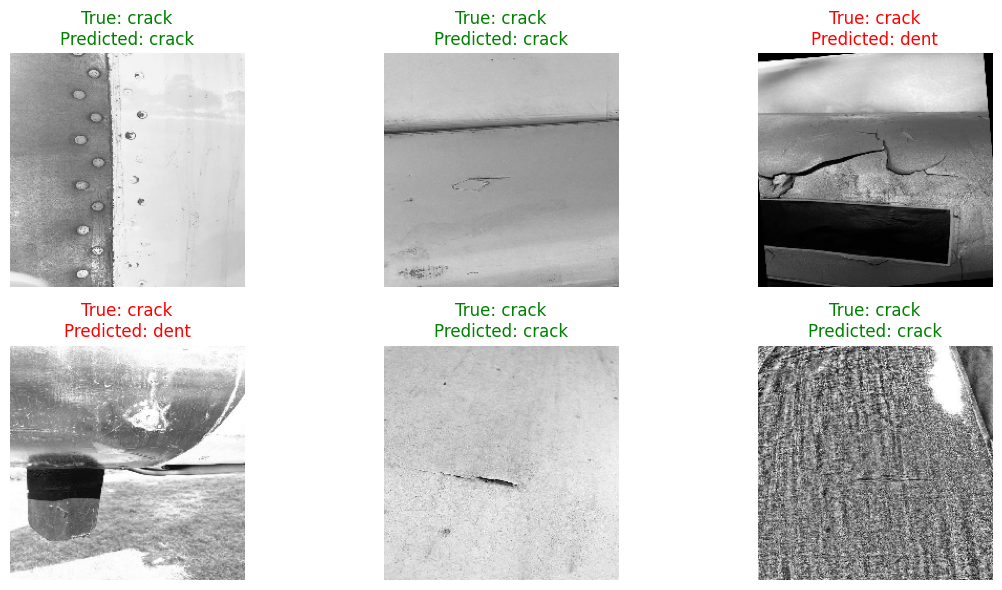

In [47]:
plt.figure(figsize=(12, 6))

# Initialize a counter for displayed images
displayed_images_count = 0

# Iterate through batches and then individual images
for batch_idx, (batch_images, _) in enumerate(test_data):
    # Break if we've already displayed 6 images
    if displayed_images_count >= 6:
        break

    for i in range(batch_images.shape[0]): # Iterate through images in the current batch
        if displayed_images_count >= 6:
            break

        image = batch_images[i]

        # Get the true label for the current image
        # Need to map the batch index and image index to the overall true_labels array
        overall_image_index = batch_idx * test_data.batch_size + i
        true_label = class_names[true_labels[overall_image_index]]
        pred_label = class_names[pred_labels[overall_image_index]]

        plt.subplot(2, 3, displayed_images_count + 1)
        plt.imshow(image)
        plt.axis("off")

        color = "green" if true_label == pred_label else "red"
        plt.title(f"True: {true_label}\nPredicted: {pred_label}", color=color)

        displayed_images_count += 1

plt.tight_layout()
plt.show()


In [49]:
def generate_text(image_tensor, task_tensor):
    return f"Generated text for image: {image_tensor.numpy().decode('utf-8')} with task: {task_tensor.numpy().decode('utf-8')}. (Placeholder output)"

In [50]:

image_path = "/content/sample_image.jpg"

image_tensor = tf.constant(image_path)
task_tensor = tf.constant("summary")


summary_output = generate_text(image_tensor, task_tensor)


summary_output


'Generated text for image: /content/sample_image.jpg with task: summary. (Placeholder output)'